## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
total_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice in the DataFrame.
len(total_data["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = total_data.loc[total_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(duplicates)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = total_data.loc[total_data["Mouse ID"] == "g989"]
#print(duplicates)
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = total_data[total_data['Mouse ID'].isin(duplicates)==False]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
summary_data = clean_data.groupby('Drug Regimen')
summ_mean = summary_data['Tumor Volume (mm3)'].mean()
summ_med = summary_data['Tumor Volume (mm3)'].median()
summ_var = summary_data['Tumor Volume (mm3)'].var()
summ_standev = summary_data['Tumor Volume (mm3)'].std()
summ_stanerr = summary_data['Tumor Volume (mm3)'].sem()
summ_stats = pd.DataFrame({"Mean Tumor Volume":summ_mean,"Median Tumor Volume":summ_med,"Tumor Volume Variance":summ_var,"Tumor Volume Std. Dev.":summ_standev,"Tumor Volume Std. Err.":summ_stanerr})
summ_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

tumor_stats = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
tumor_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

<function matplotlib.pyplot.show(*args, **kw)>

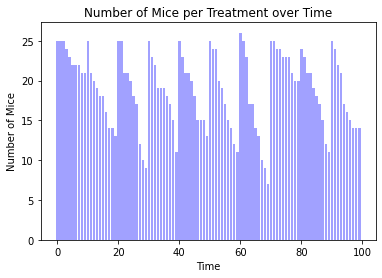

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

drug_time = clean_data.groupby(['Drug Regimen','Timepoint'])
time = np.arange(0, len(drug_time), 1)
number = drug_time['Mouse ID'].count()

plt.bar(time, number, color="blue", alpha=0.37, align="center")
plt.xlabel("Time")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment over Time")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

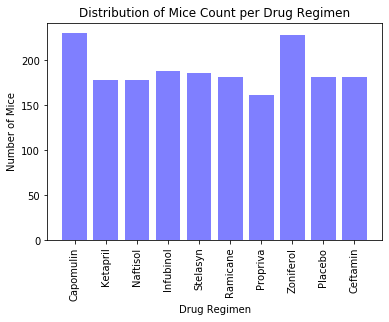

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

drug_time = clean_data.groupby(['Drug Regimen'])

regimen = np.arange(0, len(drug_time), 1)
number = drug_time['Mouse ID'].count()

# using drug labels and rotating 
labels = [drug for drug in regimen]
plt.xticks(labels, clean_data['Drug Regimen'].unique(),rotation=90 )

# labeling graph and displaying
plt.title("Distribution of Mice Count per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.bar(regimen, number, color="blue", alpha=0.5, align="center")
plt.show


## Pie Plots

Text(0.5, 1.0, 'Gender Distribution')

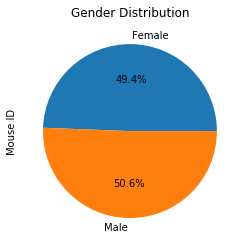

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#separating to filter by gender
gender = clean_data.groupby("Sex")
#counting gender
gender_count = gender["Mouse ID"].count()
#plotting
gender_pie = gender_count.plot(kind="pie",autopct="%1.1f%%")
gender_pie.set_title("Gender Distribution")

Text(0.5, 1.0, 'Gender Distribution')

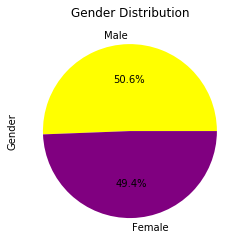

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#a different way to plot
gender_count = clean_data.Sex.value_counts()

#making it pretty and unique
labels = ["Male","Female"]
colors = ["yellow","purple"]
#plotting and labeling
plt.pie(gender_count.values,colors=colors, labels=labels,autopct='%1.1f%%')
plt.ylabel("Gender")
plt.title("Gender Distribution")

## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

final_tumor= clean_data.groupby(['Mouse ID'])['Timepoint'].max()
final_tumor = pd.DataFrame(final_tumor)
final_tumor = pd.merge(clean_data, final_tumor, on=('Mouse ID', 'Timepoint'))

#gives max time
timepoint = final_tumor['Timepoint'].max()
time_df = final_tumor.loc[(final_tumor["Timepoint"] == 45)]
#time_df

#empty list for graphing
tumor = []
#treatment list
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

for drug in treatments:
    volume = time_df.loc[(time_df["Drug Regimen"] == drug)]
    tumor_vol = volume["Tumor Volume (mm3)"]
    tumor.append(tumor_vol)
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    low_bound = lowerq - (1.5*iqr)
    up_bound = upperq + (1.5*iqr)
    
    print(f"{drug}'s tumor volume statistics are as follows: Lower Quartile - {lowerq}, Upper Quartile - {upperq}, IQR - {iqr}")
    print(f"The median is {quartiles[0.5]} and outliers would include anything above {up_bound} and anything below {low_bound}.")

Capomulin's tumor volume statistics are as follows: Lower Quartile - 32.37735684, Upper Quartile - 40.1592203, IQR - 7.781863460000004
The median is 37.31184577 and outliers would include anything above 51.83201549 and anything below 20.70456164999999.
Ramicane's tumor volume statistics are as follows: Lower Quartile - 30.981175224999998, Upper Quartile - 38.508305307499995, IQR - 7.527130082499998
The median is 34.848627300000004 and outliers would include anything above 49.79900043124999 and anything below 19.690480101250003.
Infubinol's tumor volume statistics are as follows: Lower Quartile - 62.75445141, Upper Quartile - 67.68556862, IQR - 4.9311172099999965
The median is 66.08306589 and outliers would include anything above 75.08224443499999 and anything below 55.35777559500001.
Ceftamin's tumor volume statistics are as follows: Lower Quartile - 61.43389223, Upper Quartile - 67.52748237, IQR - 6.093590140000003
The median is 64.29983003 and outliers would include anything above 76

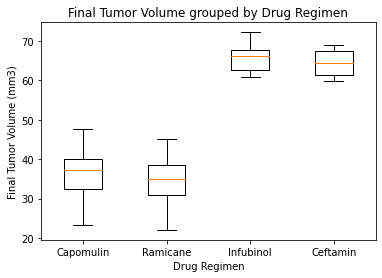

In [52]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor, labels = treatment_list)
plt.title("Final Tumor Volume grouped by Drug Regimen")
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

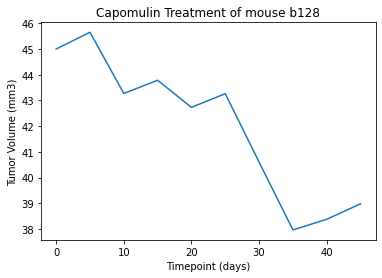

In [53]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_table = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]

#print(capomulin_table)
mouse = capomulin_table.loc[capomulin_table['Mouse ID']== 'b128']
plt.plot(mouse['Timepoint'],mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of mouse b128')
plt.show()


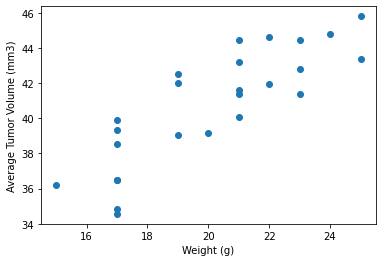

In [55]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_table = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

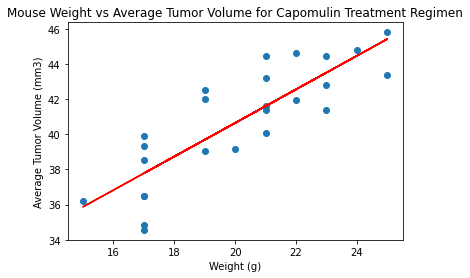

The correlation coefficient is: 0.8419363424694718
The linear regression model equation is: y = 0.95x + 21.55


In [62]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x = capomulin_average["Weight (g)"]
y = capomulin_average["Tumor Volume (mm3)"]


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
values = x * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y)
plt.plot(x,values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin Treatment Regimen")
plt.show()

print(f"The correlation coefficient is: {rvalue}")
print(f"The linear regression model equation is: {equation}")
print("We can notice that there's a solid positive correlation between mouse weight and average tumor volume.")
print("When looking at the boxplot, there seems to be a stark difference between Capomulin and Ramicane as treatments")
print("versus the Infubinol and Ceftamin treatments. There is a significant drop in tumor volume for the former treatments.")
print("The line plot displaying mouse b1")